#**Part 2: Preprocessing**

**Preprocessing in scikit-learn** means preparing data before modeling — like:

* **Scaling features** (`StandardScaler`)

* **Encoding categories** (`LabelEncoder`, `OneHotEncoder`)

* **Handling missing values** (`SimpleImputer`)

* **Normalizing** or **binarizing** data

It's essential to make data suitable for machine learning models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("drawndata1.csv")

In [ ]:
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [ ]:
X = df[['x', 'y']].values

y = df['z'] == "a"

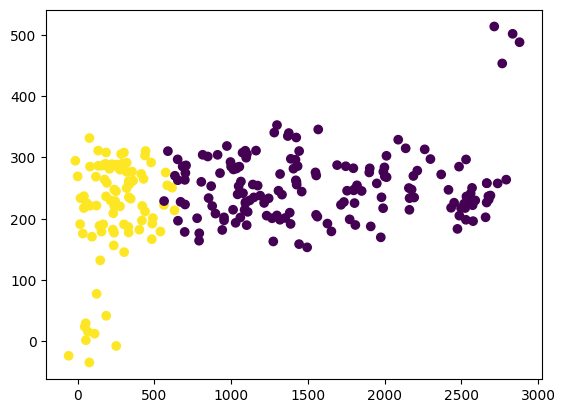

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=y);


Just applying a scaler here.

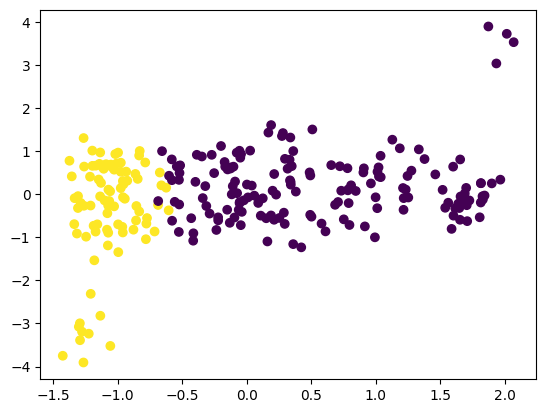

In [ ]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:,0], X_new[:, 1], c=y);

Since there are outliers present in it so now we will use QuantileTransformer

* `QuantileTransformer` in scikit-learn transforms features to follow a **uniform or normal distribution** using quantiles.

**Purpose:**

* Makes feature distribution more Gaussian-like or **uniform**.

* Reduces the impact of **outliers**.

* Useful for models sensitive to feature distribution (like KNN, SVM).

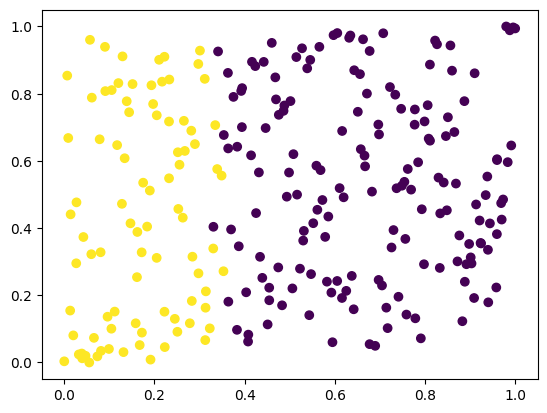

In [ ]:
from sklearn.preprocessing import QuantileTransformer

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);


Function to deal with the plotting.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [ ]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)),
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

##Effect of StandardScaler

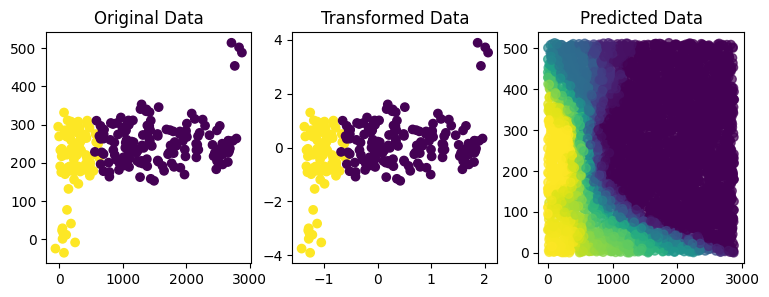

In [ ]:
plot_output(scaler=StandardScaler())

**What it does:**

* Transforms data to have **mean = 0** and **standard deviation = 1**.

**Effect (middle plot):**

* Centered and scaled features.

* Still keeps the shape of the original distribution (not uniform).

* Works well if your data is normally distributed.

**Prediction Impact (right plot):**

* Decision boundaries are more sensitive to outliers or skewness.

**When to use StandardScaler:**

* Normal data, linear models


##Effect of QuantileTransformer

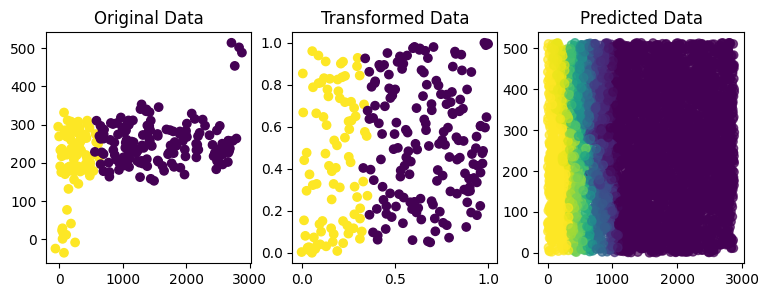

In [ ]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

**What it does:**

* Maps the data to a **uniform distribution** (or normal, if specified).

**Effect (middle plot):**

* Flattens outliers and distributes all data points **evenly**.

* Breaks any strong skew or heavy tails.

* Especially useful when original data is not Gaussian.

**Prediction Impact (right plot):**

* Class boundaries become more even, especially in skewed datasets.

**When to use QuantileTransformer:**

* Skewed data, tree models, KNN, SVM

##**New Dataset**

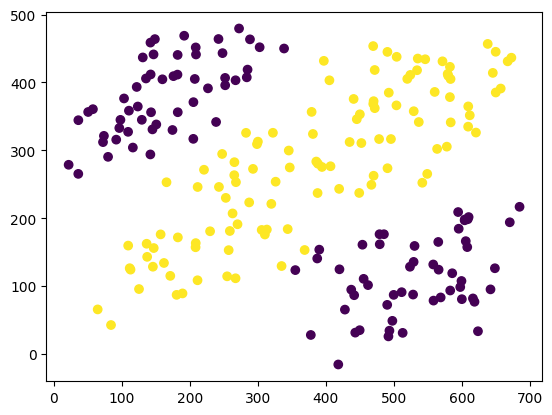

In [ ]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

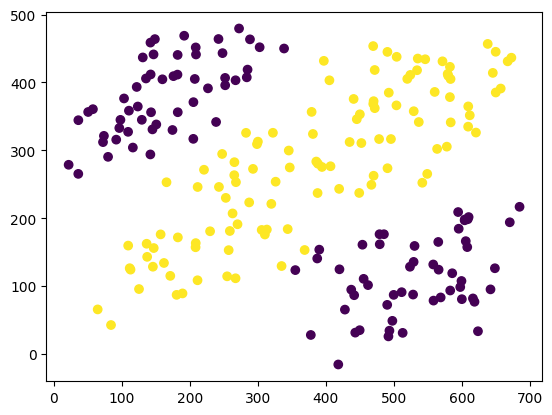

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

###**One-Hot Encoding**

One-Hot Encoding is a method to convert **categorical variables** (like "red", "blue", "green") into **numeric form** so that machine learning models can understand them.


**How It Works:**

Each category is converted into a **binary column** (0 or 1).

Only one column is **"hot"** (1) at a time — hence the name one-hot.

**Example:**

Original column:

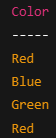

After one-hot encoding:

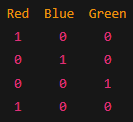


In [ ]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
enc.transform([['zero']])

array([[0., 0., 0.]])